In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import glob
import numpy as np
data=[]
y=[]
def path_reading(path,k):
  for file in glob.glob(path):
    image_read = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    images=cv2.resize(image_read,(100,100))
    data.append(images)
    y.append(k)
img_path="/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/DR/*.*"
path_reading(img_path,1)

img_path="/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/No_DR/*.*"
path_reading(img_path,0)

data=np.array(data)
y=np.array(y)

print(data,y)

[[[129 128 128 ... 128 130 128]
  [128 130 126 ... 132 128 128]
  [128 129 126 ... 131 126 128]
  ...
  [128 128 129 ... 128 128 128]
  [128 130 128 ... 130 128 128]
  [129 128 129 ... 128 128 128]]

 [[127 127 130 ... 127 128 127]
  [129 127 129 ... 131 130 128]
  [128 128 126 ... 127 125 127]
  ...
  [127 125 130 ... 127 131 126]
  [129 128 131 ... 131 129 127]
  [127 124 124 ... 129 131 127]]

 [[129 128 125 ... 129 129 129]
  [128 128 130 ... 132 130 130]
  [128 128 130 ... 129 130 127]
  ...
  [129 128 129 ... 131 130 130]
  [127 129 125 ... 128 130 129]
  [130 128 128 ... 128 129 128]]

 ...

 [[127 127 129 ... 133 127 127]
  [129 126 127 ... 129 130 128]
  [127 127 127 ... 127 128 125]
  ...
  [128 131 129 ... 132 129 129]
  [127 131 128 ... 127 126 128]
  [127 128 128 ... 127 128 128]]

 [[131 129 128 ... 128 128 131]
  [126 127 126 ... 128 128 126]
  [127 126 126 ... 128 128 127]
  ...
  [128 128 128 ... 128 128 128]
  [128 128 128 ... 128 128 128]
  [127 128 128 ... 128 128 1

In [ ]:
print(data.shape)
print(y.shape)

(3662, 100, 100)
(3662,)


In [ ]:
nsamples, nx, ny = data.shape
x = data.reshape((nsamples,nx*ny))
print(x.shape)

(3662, 10000)


In [ ]:
from sklearn.utils import shuffle
x,y=shuffle(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)#normalizing
xtest = sc_x.transform(xtest)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 42)

In [ ]:
model.fit(xtrain, ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(xtest)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Confusion Matrix : 
 [[417  37]
 [ 31 431]]
Accuracy :  0.925764192139738


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       454
           1       0.92      0.93      0.93       462

    accuracy                           0.93       916
   macro avg       0.93      0.93      0.93       916
weighted avg       0.93      0.93      0.93       916



**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors = 1)
 
knn.fit(xtrain, ytrain)
pred = knn.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print ("Accuracy : ", accuracy_score(ytest,pred))
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

Accuracy :  0.9115720524017468
[[402  52]
 [ 29 433]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       454
           1       0.89      0.94      0.91       462

    accuracy                           0.91       916
   macro avg       0.91      0.91      0.91       916
weighted avg       0.91      0.91      0.91       916



**Desicion Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
15
clf_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4, random_state=42)


Decision Tree:- 


[Text(0.45689655172413796, 0.9, 'x[525] <= 0.326\ngini = 0.5\nsamples = 2746\nvalue = [1351, 1395]'),
 Text(0.1896551724137931, 0.7, 'x[9962] <= 0.453\ngini = 0.201\nsamples = 1237\nvalue = [1097, 140]'),
 Text(0.06896551724137931, 0.5, 'x[570] <= -0.856\ngini = 0.122\nsamples = 1137\nvalue = [1063, 74]'),
 Text(0.034482758620689655, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.10344827586206896, 0.3, 'x[5694] <= -1.717\ngini = 0.1\nsamples = 1122\nvalue = [1063, 59]'),
 Text(0.06896551724137931, 0.1, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.13793103448275862, 0.1, 'gini = 0.092\nsamples = 1116\nvalue = [1062, 54]'),
 Text(0.3103448275862069, 0.5, 'x[2507] <= -0.342\ngini = 0.449\nsamples = 100\nvalue = [34, 66]'),
 Text(0.2413793103448276, 0.3, 'x[7497] <= -1.645\ngini = 0.301\nsamples = 76\nvalue = [14, 62]'),
 Text(0.20689655172413793, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.27586206896551724, 0.1, 'gini = 0.161\nsamples = 68\nvalue = [6, 

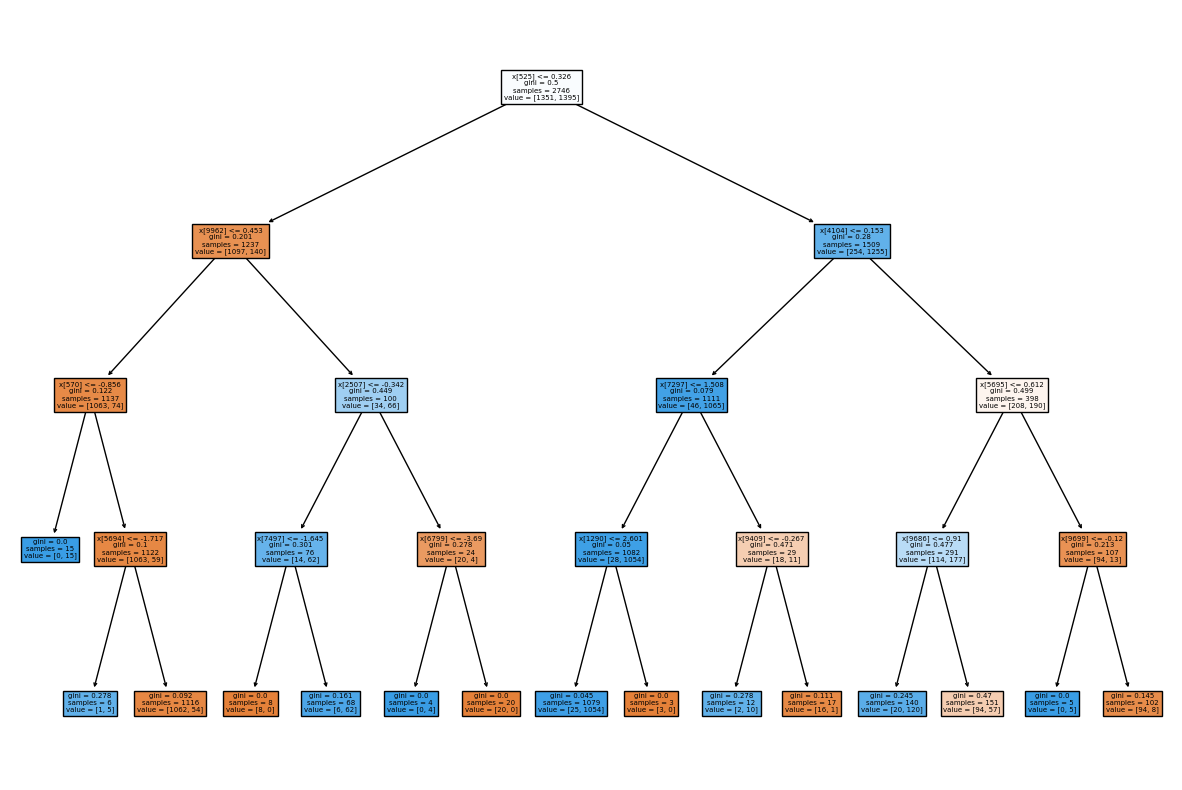

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
# Plotting the Decision tree
print('\nDecision Tree:- ')
plt.figure(figsize=(15,10))
tree.plot_tree(clf_tree, filled=True)

In [ ]:
pre=clf_tree.predict(xtest)

In [ ]:
pre

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
print ("Accuracy : ", accuracy_score(ytest,pre))
print(confusion_matrix(ytest, pre))
print(classification_report(ytest, pre))

Accuracy :  0.9050218340611353
[[418  36]
 [ 51 411]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       454
           1       0.92      0.89      0.90       462

    accuracy                           0.91       916
   macro avg       0.91      0.91      0.91       916
weighted avg       0.91      0.91      0.91       916



**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
cl = SVC(kernel='linear', probability=True, random_state=42)
cl.fit(xtrain, ytrain)

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
p=cl.predict(xtest)

In [ ]:
print ("Accuracy : ", accuracy_score(ytest,p))
print(confusion_matrix(ytest, p))
print(classification_report(ytest, p))

Accuracy :  0.9192139737991266
[[413  41]
 [ 33 429]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       454
           1       0.91      0.93      0.92       462

    accuracy                           0.92       916
   macro avg       0.92      0.92      0.92       916
weighted avg       0.92      0.92      0.92       916



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=10, random_state=42)
regressor.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
dn=regressor.predict(xtest)

In [ ]:
dn

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
print ("Accuracy : ", accuracy_score(ytest,dn))
print(confusion_matrix(ytest, dn))
print(classification_report(ytest, dn))

Accuracy :  0.915938864628821
[[424  30]
 [ 47 415]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       454
           1       0.93      0.90      0.92       462

    accuracy                           0.92       916
   macro avg       0.92      0.92      0.92       916
weighted avg       0.92      0.92      0.92       916



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(xtrain,ytrain)
y1=nb.predict(xtest)

In [ ]:
print ("Accuracy : ", accuracy_score(y1,dn))
print(confusion_matrix(y1, dn))
print(classification_report(y1, dn))

Accuracy :  0.9224890829694323
[[413  13]
 [ 58 432]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       426
           1       0.97      0.88      0.92       490

    accuracy                           0.92       916
   macro avg       0.92      0.93      0.92       916
weighted avg       0.93      0.92      0.92       916



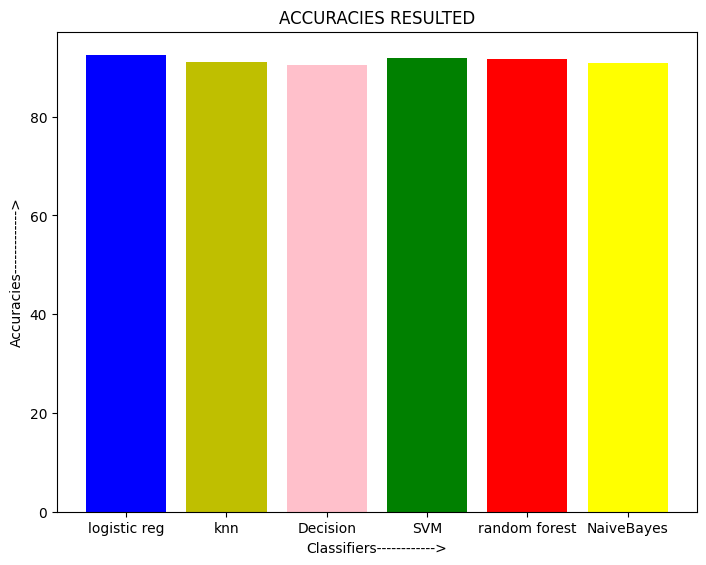

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

algo = ['logistic reg','knn','Decision','SVM','random forest','NaiveBayes']

accuracy = [accuracy_score(ytest, y_pred)*100,accuracy_score(ytest,pred)*100,accuracy_score(ytest,pre)*100,accuracy_score(ytest,p)*100,accuracy_score(ytest,dn)*100,accuracy_score(ytest,y1)*100]

ax.bar(algo[0],accuracy[0],color = 'b')

ax.bar(algo[1],accuracy[1],color = 'y')

ax.bar(algo[2],accuracy[2],color = 'pink')

ax.bar(algo[3],accuracy[3],color = 'green')

ax.bar(algo[4],accuracy[4],color = 'r')

ax.bar(algo[5],accuracy[5],color = 'yellow')

plt.xlabel('Classifiers------------>')

plt.ylabel('Accuracies------------->')

plt.title('ACCURACIES RESULTED')

plt.show()

**CROSS VALIDATION**

In [ ]:

img = cv2.imread("/content/drive/MyDrive/Check.png",cv2.IMREAD_GRAYSCALE)
print(img)

[[129 128 128 ... 132 128 130]
 [127 129 130 ... 129 130 131]
 [127 128 129 ... 129 127 130]
 ...
 [128 129 129 ... 131 133 127]
 [129 129 131 ... 127 126 128]
 [130 127 131 ... 130 128 130]]


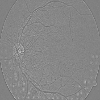

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.resize(img,(100,100))
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
test=np.array(img)

In [ ]:
print(test.shape)

(100, 100)


In [ ]:
print(test)

[[128 128 129 ... 126 127 130]
 [131 127 131 ... 126 130 129]
 [129 129 130 ... 126 127 127]
 ...
 [128 130 131 ... 128 128 129]
 [129 127 127 ... 128 131 127]
 [128 128 129 ... 126 125 127]]


In [ ]:
t=test.reshape(1,10000)

In [ ]:
print(t.shape)

(1, 10000)


In [ ]:
prediction=regressor.predict(t)

In [ ]:
prediction

array([0])